In [34]:
import sys
sys.path.append('..')

In [35]:
import numpy as np
import pandas as pd
import sklearn
from core.dataset import *
import xgboost as xgb
import matplotlib.pyplot as plt

In [36]:
load_dir = 'D:/Data/hoffmanlab/featureselection/data/'
ligands = ['CpG', 'FLA', 'FSL', 'LPS', 'P3K', 'PIC', 'R84', 'TNF']
sheet_type = 'am'

In [37]:
dataset = Data(load_dir, ligands, sheet_type, merge=True)

In [38]:
dataset.shape
# 14376 entries, 984 features, last column is the corresponding class label

(14376, 985)

In [39]:
X = dataset.iloc[:, [i for i in range(984)]]
y = dataset.iloc[:, [984]]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [42]:
model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, min_child_weight=0, max_depth=15)

In [43]:
model.fit(X_train, y_train)

[18:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [49]:
pred = model.predict(X_val)

In [50]:
pred_df = pd.DataFrame(pred)
y_val_df = pd.DataFrame(y_val)

In [51]:
from sklearn.metrics import classification_report

In [52]:
cr = classification_report(y_val, pred, target_names=ligands)

In [53]:
print(cr)

              precision    recall  f1-score   support

         CpG       0.52      0.55      0.53       196
         FLA       0.52      0.41      0.45       143
         FSL       0.58      0.62      0.60       189
         LPS       0.59      0.77      0.67       149
         P3K       0.62      0.48      0.54       185
         PIC       0.72      0.70      0.71       165
         R84       0.77      0.82      0.79       249
         TNF       0.73      0.69      0.71       162

    accuracy                           0.64      1438
   macro avg       0.63      0.63      0.63      1438
weighted avg       0.64      0.64      0.64      1438



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

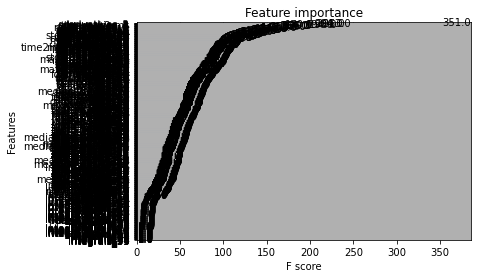

In [15]:
xgb.plot_importance(model)

In [16]:
feature_importance = model.feature_importances_

In [17]:
argsort = model.feature_importances_.argsort()

In [18]:
sorted_fi = argsort[::-1] # 10 most important features?

#### a lot of the features (sorted by importance) are sequential
* 750ish - 800ish is power_xyz

In [19]:
test = pd.read_csv(load_dir + 'CpG_am.csv') # just using this as a placeholder to extract columns for plotting

In [20]:
import seaborn as sns

<AxesSubplot:>

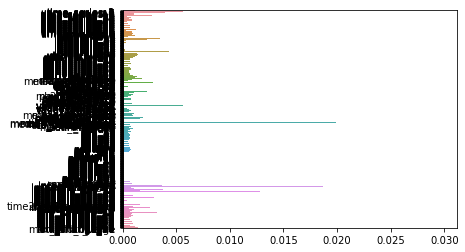

In [21]:
sns.barplot(x=feature_importance, y=test.columns)

<AxesSubplot:>

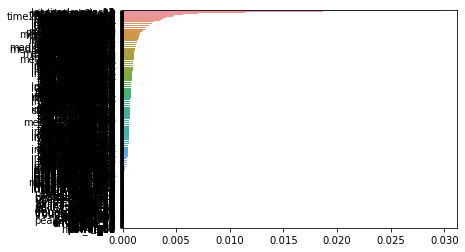

In [22]:
sns.barplot(x=feature_importance[sorted_fi], y=test.columns[sorted_fi])

#### data plots are too cluttered due to size of features

In [23]:
sorted_features = test.columns[sorted_fi]

In [24]:
df_sorted_features = pd.DataFrame(sorted_features)

In [25]:
df_sorted_features.to_csv('C:/Users/minha/Research/hoffmanlab/featuresel/data/untuned_model_feature_importance5.csv', index=False)

In [26]:
sorted_features[:100] # 100 most important features

Index(['integrals_pos_12', 'time_series_2', 'integrals_pos_11', 'integrals_40',
       'min_trough2peak', 'integrals_pos_14', 'integrals_10',
       'integrals_pos_40', 'integrals_pos_36', 'envelope_3', 'envelope_2',
       'fold_change_20', 'oscpower', 'integrals_22', 'integrals_13',
       'integrals_60', 'valley_amps_6', 'time_series_6', 'valley_amps_3',
       'integrals_pos_35', 'derivatives_1', 'integrals_pos_37',
       'time2HalfMaxIntegral', 'fold_change_17', 'fold_change_3',
       'integrals_4', 'derivatives_3', 'time_series_11', 'fold_change_21',
       'oscbandwidth', 'integrals_89', 'valley_amps_5', 'valley_amps_2',
       'time_series_10', 'peak2rms', 'intwin1_1', 'derivatives_2',
       'integrals_pos_27', 'integrals_pos_67', 'fold_change_29',
       'integrals_pos_49', 'integrals_pos_9', 'time_series_3', 'fold_change_2',
       'integrals_29', 'integrals_30', 'fold_change_24', 'fold_change_31',
       'peak_amps_1', 'integrals_pos_63', 'peak_times_1', 'integrals_31',
 

In [27]:
numerically_sorted_features = sorted(feature_importance)

In [28]:
numerically_sorted_features = numerically_sorted_features[::-1]

In [29]:
numerically_sorted_features[:10] # the most important features are 3x more important than the bottom of the 10

[0.029726757,
 0.026820967,
 0.026264776,
 0.019964652,
 0.019936968,
 0.018649433,
 0.0138979405,
 0.013502658,
 0.012825438,
 0.011374371]

#### some basic takeaways:
* some of the most important features include: integrals_pos, min_trough2peak, integrals, oscpower, envelope, time2halfmaxintegral, fold_change, derivatives
* the 7 MOST important features: 
       'integrals_pos_38', 'min_trough2peak', 'integrals_pos_11',
       'integrals_40', 'integrals_pos_14', 'time_series_2', 'integrals_pos_12'